In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("./")
os.getcwd()

'/Users/xiaohanduan/Documents/Code/R/06_JunyeChen/code_submit/Supfig_BEF'

[[  8.35236664 -45.80048483]
 [  8.75379705  33.76230577]
 [-37.17637277  26.87069077]
 [ 38.67111266  -1.43900035]
 [-25.42493196 -14.72087258]]
[[-37.8716802   19.05061462   2.        ]
 [ 34.0174526   44.39153189   1.        ]
 [-16.49103182  32.30371741   2.        ]
 ...
 [-29.9674279   24.45388914   2.        ]
 [-20.26059393 -51.32266124   0.        ]
 [-33.97022091  18.02826384   2.        ]]
[[-3.51551737e+01  3.04384807e+01]
 [ 5.58803278e+00 -4.20678975e+01]
 [ 7.29938660e+00  3.20770199e+01]
 [ 4.11620241e+01 -1.69098468e-02]
 [-2.72801363e+01 -1.45977407e+01]]
[[ 52.49146079  16.59238521   3.        ]
 [-49.06097739  23.02860424   0.        ]
 [ -8.78116688   4.8288122    4.        ]
 ...
 [-48.50492316  -8.99295211   4.        ]
 [  4.09481887  36.32700974   2.        ]
 [-32.08473929 -16.73907648   4.        ]]
[[ 20.13748721   9.75562954]
 [-32.74342517   0.26173571]
 [ 31.43080282 -28.37641537]
 [ -3.37801436  41.0883621 ]
 [-10.0519201  -33.07956874]]
[[-46.97969559  

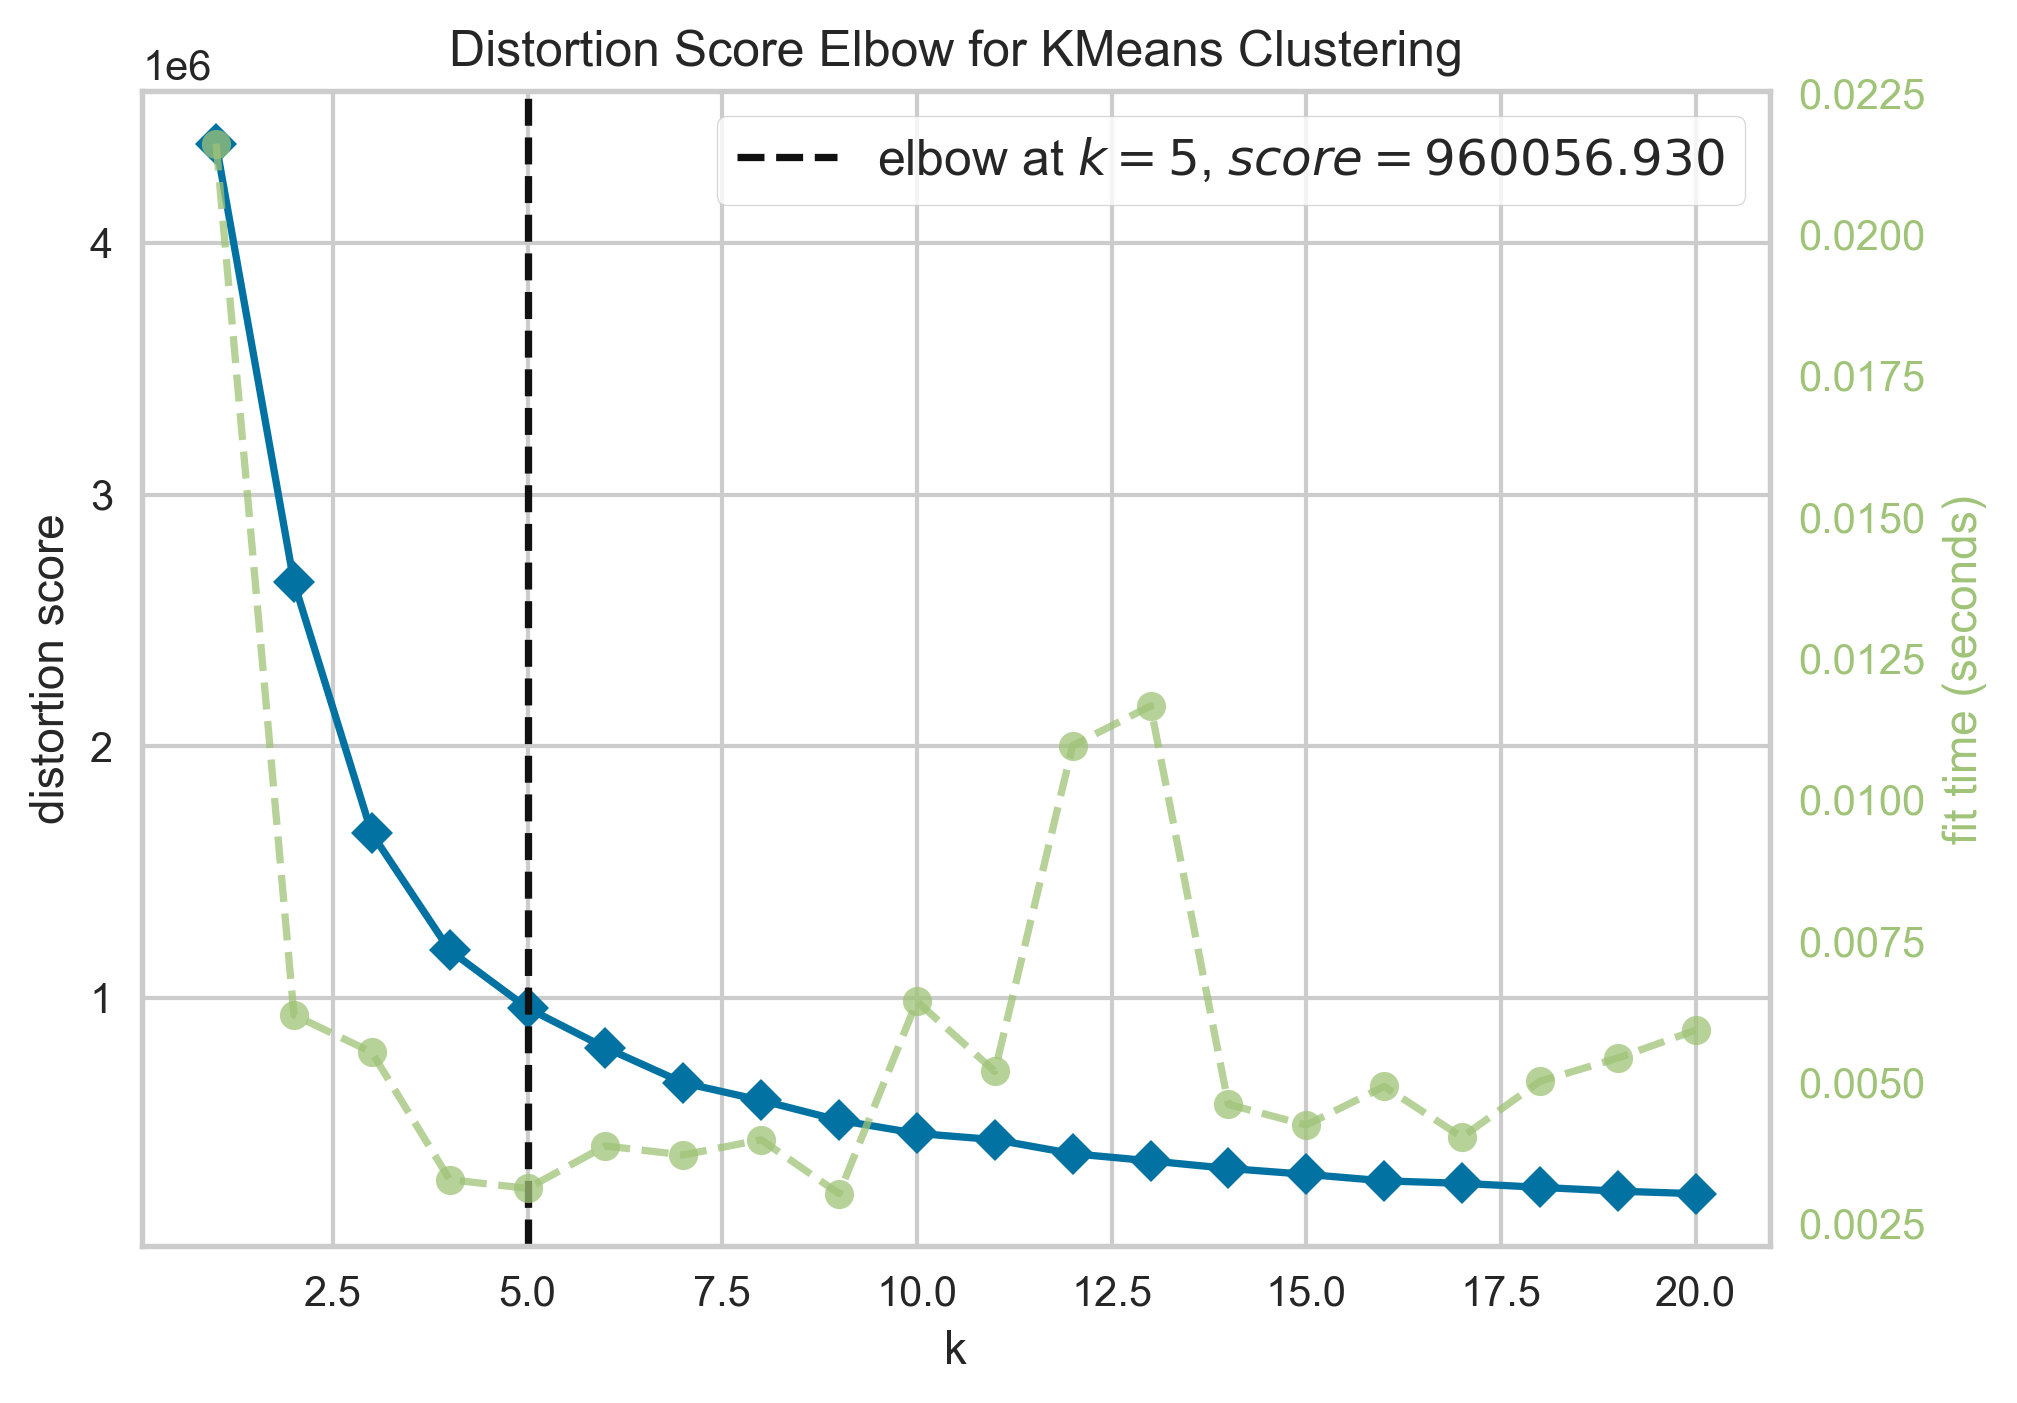

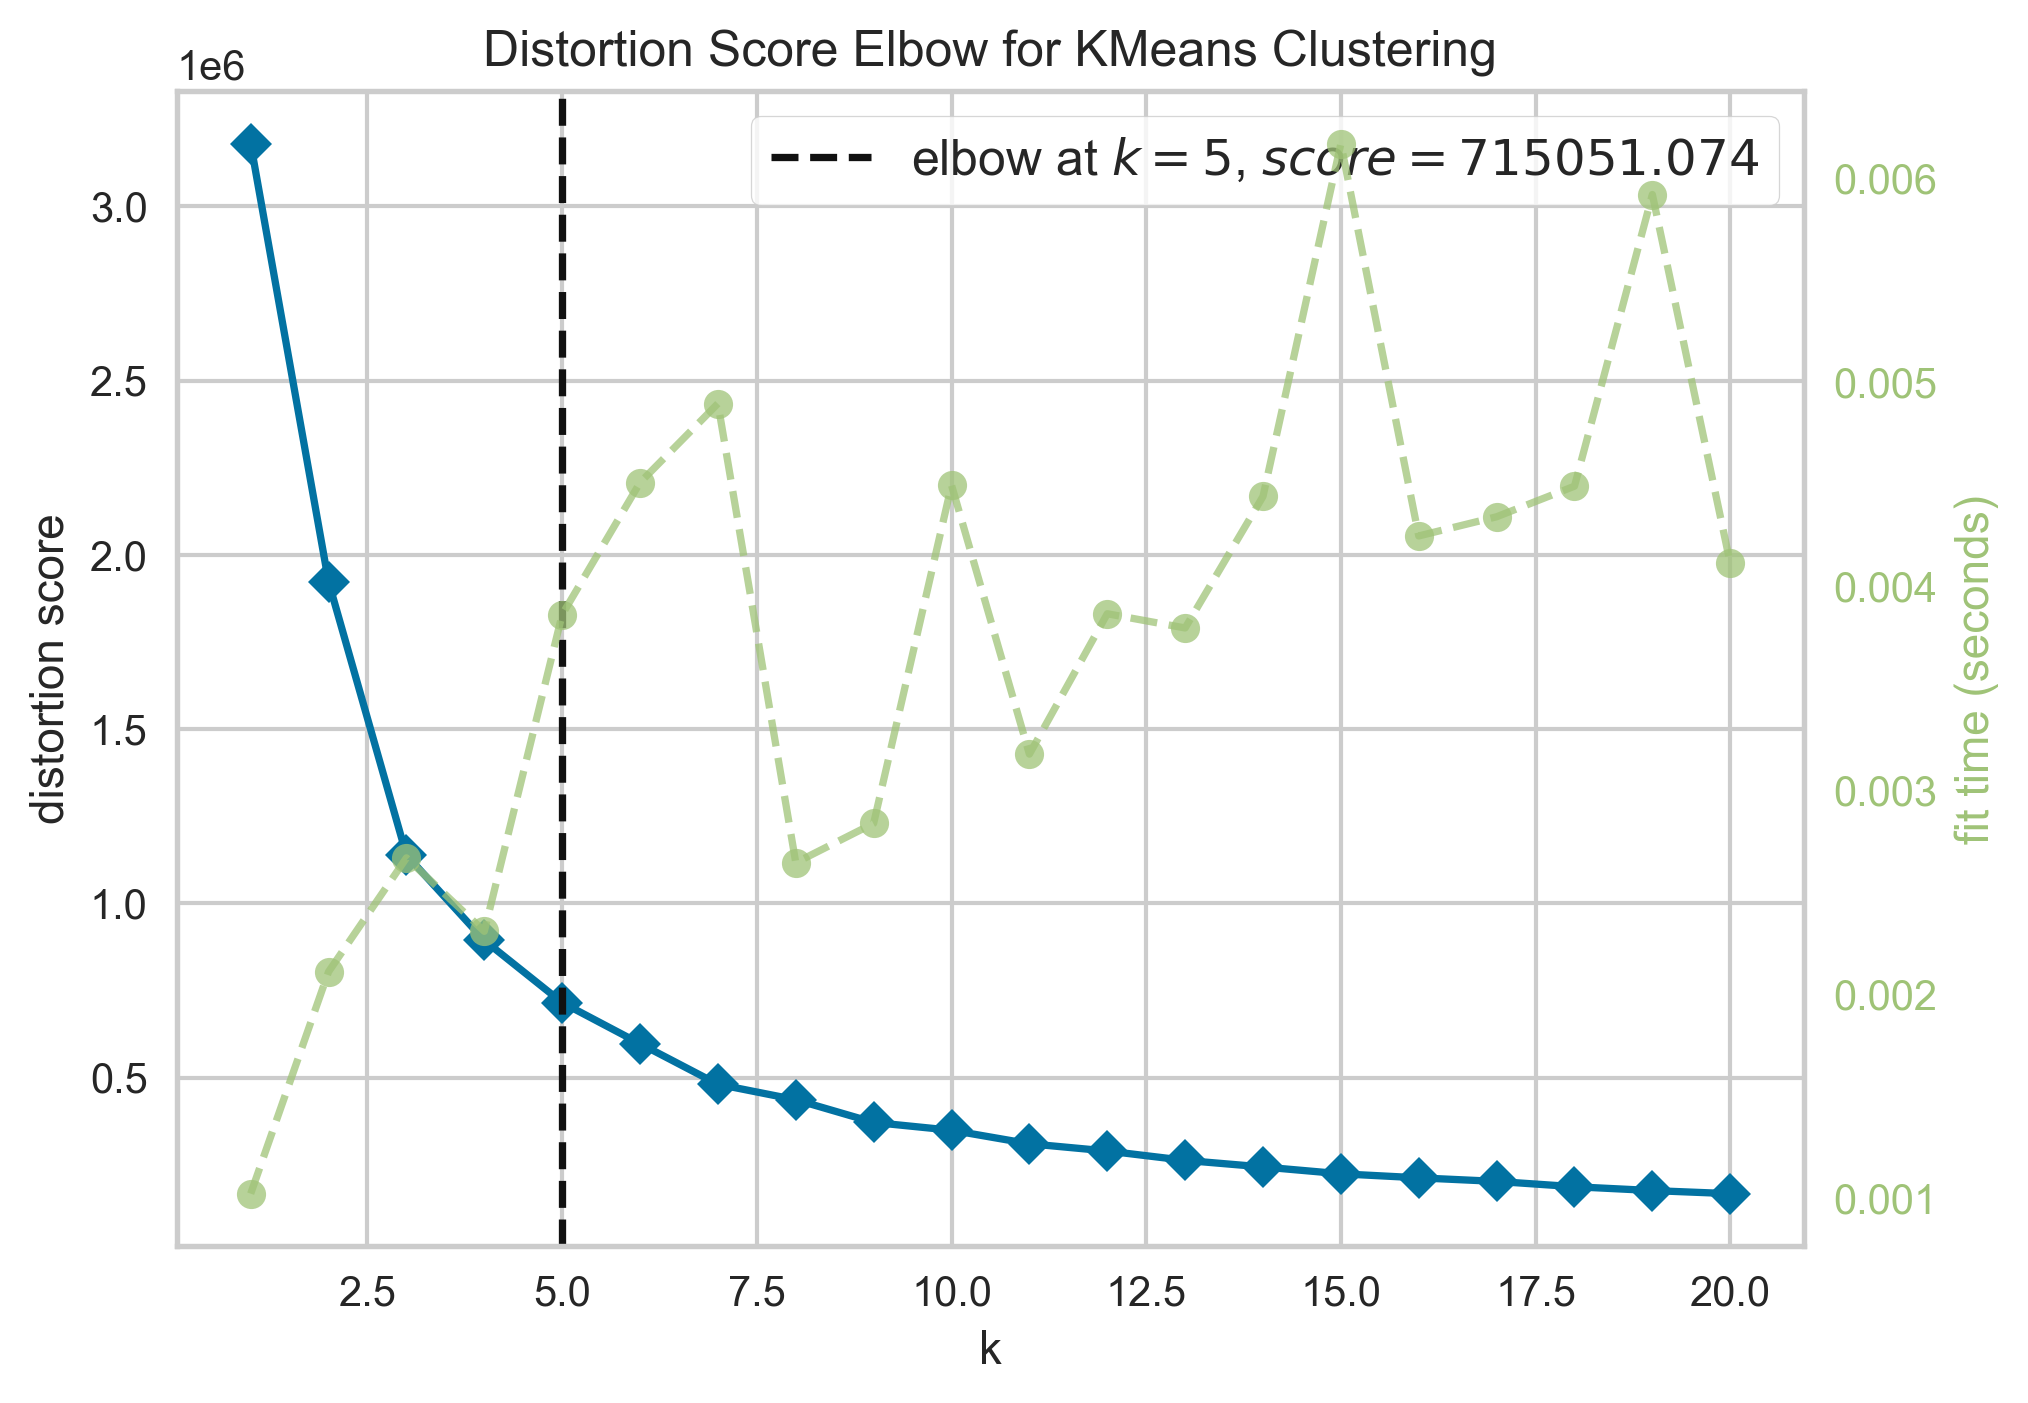

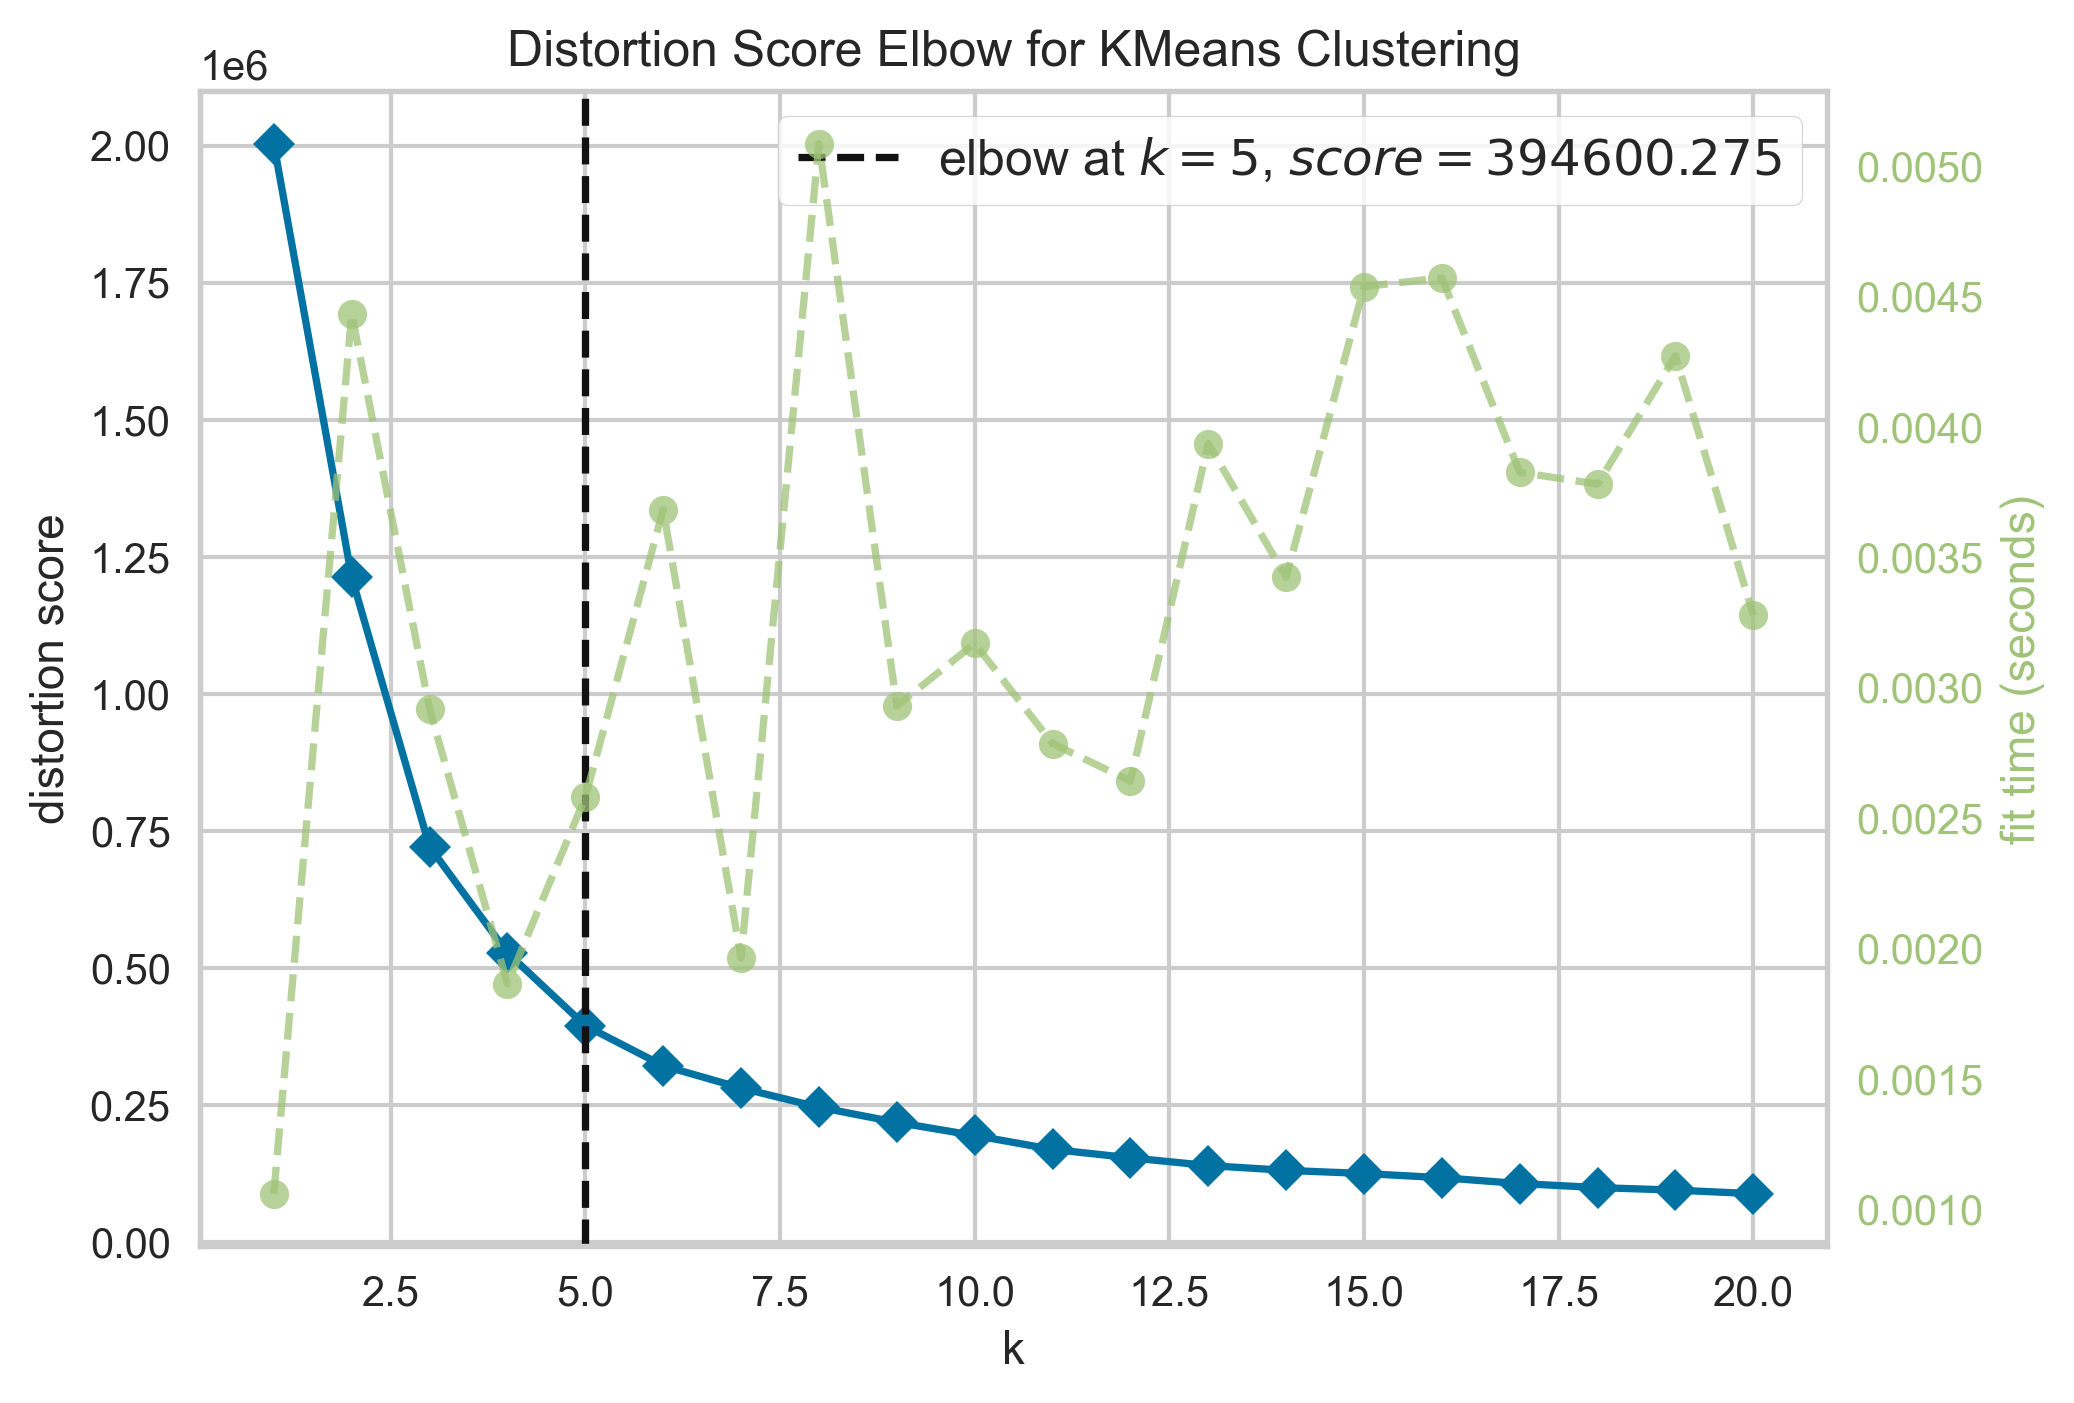

In [3]:
out_dir = './fig_output/'

for file in os.listdir("./puxi_output/"):
    if file.endswith("tsne.csv"):

        X = pd.read_csv("./puxi_output/"+file, index_col=0)
        outfile = file.replace(".csv", "_label.csv")
        figname = file.replace(".csv", "")

        plt.figure(figsize=(7,5), dpi=300)
        model = KMeans(random_state=4)
        dd = KElbowVisualizer(model, k=(1, 21)) 
        dd.fit(X) 
        dd.poof(outpath=out_dir + figname + '.pdf')

        km = dd.elbow_value_

        mdl = pd.DataFrame.from_records(X, columns=["TSNE_1", "TSNE_2"])
        seed = 4  
        clf = KMeans(n_clusters=km, random_state=seed) 
        clf.fit(mdl) 

        print(clf.cluster_centers_) 
        mdl['label'] = clf.labels_ 
        c = mdl['label'].value_counts()
        mdl.index = X.index
        print(mdl.values) 

        mdl.to_csv("./" + out_dir + outfile)